# Animation

Isso requer uma biblioteca separada chamada `ipympl`. A animação depende dessa biblioteca porque ela fornece uma novo backend para nós, chamado `widget`.

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

O `matplotlib.animation` contém auxiliares importantes pra construir animações, e para nosso propósito hoje, utilizaremos o objetos `FuncAnimation`. Esse objeto constrói uma animação chamando uma função iterativamente que nós definimos. Essa função é limpar o axis object e redesenhar o próximo frame da animação.

Vamos construir uma animação básica com 100 amostras de uma distribuição normal.

In [2]:
n=100
x=np.random.randn(n)


Agora precisamos criar uma função que irá fazer o plot.
O objeto FuncAnimation irá chamar essa função a cada milisegundo e passar o número do quadro em que estamos.

In [3]:
# curr é o dataframe atual
def update(curr):
    # checar se a animação está no último frame, se estiver para a animação
    if curr == n: 
        a.event_source.stop()
    
    # Precisamos limpar axis Object a cada frame
    plt.cla()
    
    # Vamos plotar um histograma com o seguinte bins
    bins = np.arange(-4, 4, 0.5)
    
    # Então, plotamos o histograma
    plt.hist(x[:curr], bins=bins)
    
    
    plt.axis([-4,4,0,30])
    
   
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

Para gerar a animação, basta gerar uma nova figura, chamar o construtor FuncAnimation e atribuí-lo à variável `a`, pois precisamos disso para nossa função `update()`, que interromperá a animação no final. O primeiro parâmetro é a figura com a qual estamos trabalhando. Isso não é tão importante aqui, pois estamos usando a interface de script pylot para gerenciar a figura. Em seguida, o nome da nossa função e a quantidade de tempo que queremos entre as atualizações. Vamos definir isso para 100 milissegundos.

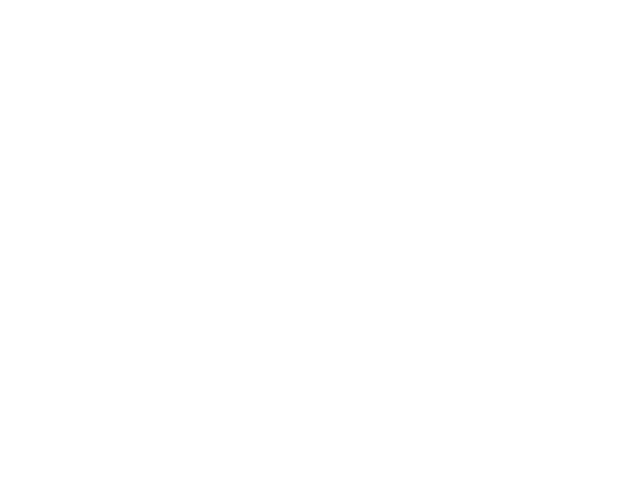

In [4]:
a = animation.FuncAnimation(plt.figure(), update, interval=100)

plt.show()

FuncAnimation, como a maioria das outras classes no pacote animation, é uma subclasse do objeto animation. O objeto de animação tem uma função de segurança útil, que permite gravar a animação em um arquivo. Isso requer uma biblioteca adicional de terceiros, como o FFMpeg, que pode demorar um pouco para instalar e configurar. Mas o resultado é que você pode exportar facilmente suas animações diretamente do ambiente de programação da Web do Júpiter.

